# Synthetic experiment

This notebook plots the results of the synthetic experiment. 

This experiment consists in seeing how OOD accuracy evolves when the proportion of "good" array and of "good" background in the training dataset evolves. 

OOD evaluation is always performed on a completely OOD dataset (called `PITW_urban`). We systematically investigate how varying proportion of "good" generalizers among the label instances affects the generalization to this unseen domain. 

We study the effect of the share of "good" generalizers on performance along with the effet of the share of "bad" backgrounds. 


Indeed, performance is mainly affected by :
- The background type in the training dataset
- The instance class in the training dataset

The characteristics of the target dataset are beyond the scope of this study.



In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import random
import json
from src import helpers
import seaborn as sns
from sklearn import metrics
import json

## Load the files

In [3]:
# Large
large_results = {}

# First key : share of the large type of array
# Second key : share of the field type of background


# 0% large
large_results[0] = {} 

with open('results/synthetic_experiment/ood_results_reference_array_large_share_0.0_field_share_0.0.json') as f:
    large_results[0][0] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_large_share_0.0_field_share_0.25.json') as f:
    large_results[0][25] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_large_share_0.0_field_share_0.5.json') as f:
    large_results[0][50] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_large_share_0.0_field_share_0.75.json') as f:
    large_results[0][75] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_large_share_0.0_field_share_1.0.json') as f:
    large_results[0][100] = json.load(f)
        
# 25% large
large_results[25] = {} 

with open('results/synthetic_experiment/ood_results_reference_array_large_share_0.25_field_share_0.0.json') as f:
    large_results[25][0] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_large_share_0.25_field_share_0.25.json') as f:
    large_results[25][25] = json.load(f)

with open('results/synthetic_experiment/ood_results_reference_array_large_share_0.25_field_share_0.5.json') as f:
    large_results[25][50] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_large_share_0.25_field_share_0.75.json') as f:
    large_results[25][75] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_large_share_0.25_field_share_1.0.json') as f:
    large_results[25][100] = json.load(f)

# 50% large
large_results[50] = {}

with open('results/synthetic_experiment/ood_results_reference_array_large_share_0.5_field_share_0.0.json') as f:
    large_results[50][0] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_large_share_0.5_field_share_0.0.json') as f:
    large_results[50][25] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_large_share_0.5_field_share_0.5.json') as f:
    large_results[50][50] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_large_share_0.5_field_share_0.75.json') as f:
    large_results[50][75] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_large_share_0.5_field_share_1.0.json') as f:
    large_results[50][100] = json.load(f)    
    
# 75% large

large_results[75] = {}

with open('results/synthetic_experiment/ood_results_reference_array_large_share_0.75_field_share_0.0.json') as f:
    large_results[75][0] = json.load(f)

with open('results/synthetic_experiment/ood_results_reference_array_large_share_0.75_field_share_0.25.json') as f:
    large_results[75][25] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_large_share_0.75_field_share_0.5.json') as f:
    large_results[75][50] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_large_share_0.75_field_share_0.75.json') as f:
    large_results[75][75] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_large_share_0.75_field_share_1.0.json') as f:
    large_results[75][100] = json.load(f) 
    
# 100% large

large_results[100] = {}

with open('results/synthetic_experiment/ood_results_reference_array_large_share_1.0_field_share_0.0.json') as f:
    large_results[100][0] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_large_share_1.0_field_share_0.25.json') as f:
    large_results[100][25] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_large_share_1.0_field_share_0.5.json') as f:
    large_results[100][50] = json.load(f)

with open('results/synthetic_experiment/ood_results_reference_array_large_share_1.0_field_share_0.75.json') as f:
    large_results[100][75] = json.load(f)

with open('results/synthetic_experiment/ood_results_reference_array_large_share_1.0_field_share_1.0.json') as f:
    large_results[100][100] = json.load(f)

In [4]:
# blue
blue_results = {}

# First key : share of the blue type of array
# Second key : share of the field type of background


# 0% blue
blue_results[0] = {} 

with open('results/synthetic_experiment/ood_results_reference_array_blue_share_0.0_field_share_0.0.json') as f:
    blue_results[0][0] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_blue_share_0.0_field_share_0.25.json') as f:
    blue_results[0][25] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_blue_share_0.0_field_share_0.5.json') as f:
    blue_results[0][50] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_blue_share_0.0_field_share_0.75.json') as f:
    blue_results[0][75] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_blue_share_0.0_field_share_1.0.json') as f:
    blue_results[0][100] = json.load(f)
        
# 25% blue
blue_results[25] = {} 

with open('results/synthetic_experiment/ood_results_reference_array_blue_share_0.25_field_share_0.0.json') as f:
    blue_results[25][0] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_blue_share_0.25_field_share_0.25.json') as f:
    blue_results[25][25] = json.load(f)

with open('results/synthetic_experiment/ood_results_reference_array_blue_share_0.25_field_share_0.5.json') as f:
    blue_results[25][50] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_blue_share_0.25_field_share_0.75.json') as f:
    blue_results[25][75] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_blue_share_0.25_field_share_1.0.json') as f:
    blue_results[25][100] = json.load(f)

# 50% blue
blue_results[50] = {}

with open('results/synthetic_experiment/ood_results_reference_array_blue_share_0.5_field_share_0.0.json') as f:
    blue_results[50][0] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_blue_share_0.5_field_share_0.0.json') as f:
    blue_results[50][25] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_blue_share_0.5_field_share_0.5.json') as f:
    blue_results[50][50] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_blue_share_0.5_field_share_0.75.json') as f:
    blue_results[50][75] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_blue_share_0.5_field_share_1.0.json') as f:
    blue_results[50][100] = json.load(f)    
    
# 75% blue

blue_results[75] = {}

with open('results/synthetic_experiment/ood_results_reference_array_blue_share_0.75_field_share_0.0.json') as f:
    blue_results[75][0] = json.load(f)

with open('results/synthetic_experiment/ood_results_reference_array_blue_share_0.75_field_share_0.25.json') as f:
    blue_results[75][25] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_blue_share_0.75_field_share_0.5.json') as f:
    blue_results[75][50] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_blue_share_0.75_field_share_0.75.json') as f:
    blue_results[75][75] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_blue_share_0.75_field_share_1.0.json') as f:
    blue_results[75][100] = json.load(f) 
    
# 100% blue

blue_results[100] = {}

with open('results/synthetic_experiment/ood_results_reference_array_blue_share_1.0_field_share_0.0.json') as f:
    blue_results[100][0] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_blue_share_1.0_field_share_0.25.json') as f:
    blue_results[100][25] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_blue_share_1.0_field_share_0.5.json') as f:
    blue_results[100][50] = json.load(f)

with open('results/synthetic_experiment/ood_results_reference_array_blue_share_1.0_field_share_0.75.json') as f:
    blue_results[100][75] = json.load(f)
    
with open('results/synthetic_experiment/ood_results_reference_array_blue_share_1.0_field_share_1.0.json') as f:
    blue_results[100][100] = json.load(f)

In [5]:
def return_mean_f1(results_dictionnary):
    return np.nanmean([np.max(results_dictionnary[it]['ood']['f1']) for it in results_dictionnary.keys()])

In [6]:
array_large = np.zeros((5,5))

for i, key in enumerate(list(large_results.keys())):
    for k, subkey in enumerate(list(large_results[key].keys())):
        array_large[i,k] = round(return_mean_f1(large_results[key][subkey]),2)


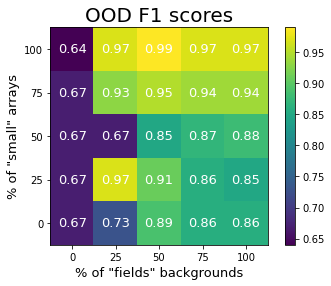

In [14]:
fig, ax = plt.subplots()

heatmap = ax.imshow(array_large)


ax.set_xticks([0,1,2,3,4]) 
ax.set_xticklabels(['0', '25', '50', '75', '100'])

ax.set_yticks([0,1,2,3,4]) 
ax.set_yticklabels(['100', '75', '50', '25', '0'])
                                         
ax.set_xlabel('% of "fields" backgrounds', fontsize = 13)
ax.set_ylabel('% of "small" arrays', fontsize = 13)


for i in range(array_large.shape[0]):
    for j in range(array_large.shape[1]):
        text = ax.text(j, i, round(array_large[i, j], 2),
                       ha="center", va="center", color="w", fontsize = 13)

fig.colorbar(heatmap)

plt.title('OOD F1 scores', fontsize = 20)
plt.savefig('figs/heatmap_large_fields_scores.pdf')
plt.show()

In [8]:
array_blue = np.zeros((5,5))

for i, key in enumerate(list(blue_results.keys())):
    for k, subkey in enumerate(list(blue_results[key].keys())):
        array_blue[i,k] = round(return_mean_f1(blue_results[key][subkey]),2)


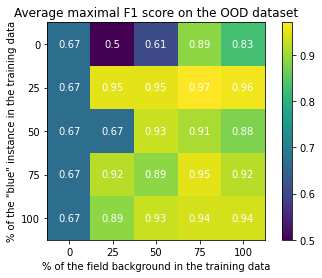

In [8]:
fig, ax = plt.subplots()

heatmap = ax.imshow(array_blue)

ax.set_xticks([0,1,2,3,4]) 
ax.set_xticklabels(['0', '25', '50', '75', '100'])

ax.set_yticks([0,1,2,3,4]) 
ax.set_yticklabels(['0', '25', '50', '75', '100'])
                                         
ax.set_xlabel('% of the field background in the training data')
ax.set_ylabel('% of the "blue" instance in the training data')


for i in range(array_blue.shape[0]):
    for j in range(array_blue.shape[1]):
        text = ax.text(j, i, round(array_blue[i, j], 2),
                       ha="center", va="center", color="w")

fig.colorbar(heatmap)

        
plt.title('Average maximal F1 score on the OOD dataset')
plt.savefig('figs/heatmap_blue_fields_scores.pdf')
plt.show()